In [5]:
import scipy.cluster.hierarchy as dendrogram
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
# Load the dataset
file_path = "/content/dataset.csv"
df = pd.read_csv(file_path)

In [7]:
# Extract labels and numerical matrix
labels = df.iloc[:, 0].values  # First column as labels
matrix = df.iloc[:, 1:].values  # Numerical values

In [8]:
# Convert similarity matrix to condensed distance matrix
# Assuming the data is a similarity matrix, convert it to a distance matrix
distance_matrix = 1 - matrix

In [9]:
# Extract upper triangular part of the distance matrix in condensed form
condensed_dist = distance_matrix[np.triu_indices(len(distance_matrix), k=1)]

In [10]:
# Generate hierarchical clustering
linked = dendrogram.linkage(condensed_dist, method='ward')

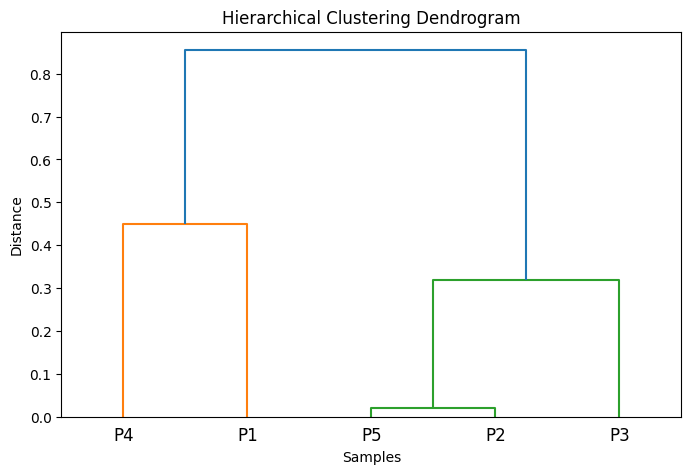

In [11]:
# Plot dendrogram
plt.figure(figsize=(8, 5))
dendrogram.dendrogram(linked, labels=labels, orientation="top", distance_sort="descending", show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

In [13]:
# Apply Agglomerative Clustering
num_clusters = 3  # Set number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters, metric='precomputed', linkage='complete')
cluster_labels = agg_clustering.fit_predict(distance_matrix)

In [14]:
# Print cluster assignments
for label, cluster in zip(labels, cluster_labels):
    print(f"{label}: Cluster {cluster}")


P1: Cluster 2
P2: Cluster 0
P3: Cluster 0
P4: Cluster 1
P5: Cluster 0


In [16]:
# Apply Agglomerative Clustering with full tree computation
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='complete', metric='precomputed')
model.fit(distance_matrix)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        metric='precomputed', n_clusters=None)

In [17]:
# Print cluster assignments
for label, cluster in zip(labels, model.labels_):
    print(f"{label}: Cluster {cluster}")

P1: Cluster 2
P2: Cluster 4
P3: Cluster 3
P4: Cluster 1
P5: Cluster 0


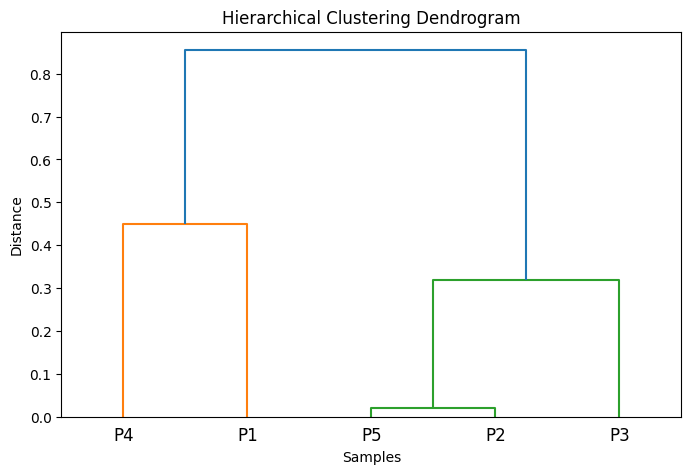

In [18]:
# Plot dendrogram
plt.figure(figsize=(8, 5))
dendrogram.dendrogram(linked, labels=labels, orientation="top", distance_sort="descending", show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

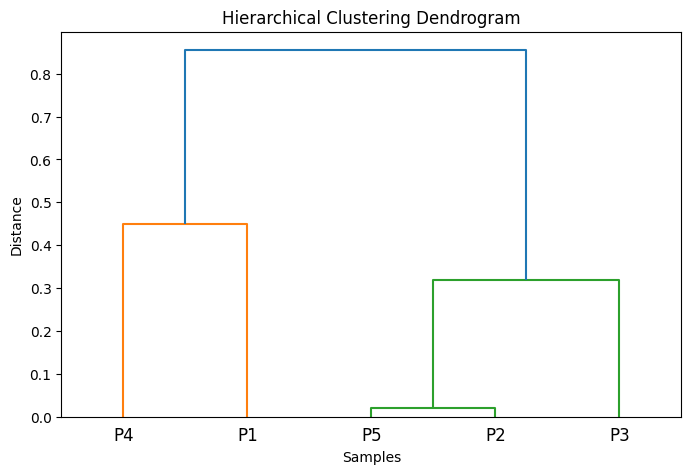

In [15]:
# Plot dendrogram
plt.figure(figsize=(8, 5))
dendrogram.dendrogram(linked, labels=labels, orientation="top", distance_sort="descending", show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()